In [115]:
import json
import string
import re
import nltk
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_set = open("C:/Users/user/Desktop/ML_Challenge/train-1.json")
train = json.load(train_set)
test_set = open("C:/Users/user/Desktop/ML_Challenge/test.json")
test = json.load(test_set)

In [3]:
df_train = pd.DataFrame(train)
df_test = pd.DataFrame(test)

In [4]:
display(df_train.head())

,doi,title,abstract,authors,venue,year,references,topics,is_open_access,fields_of_study,citations
0,10.3115/v1/P15-1039,Generating High Quality Proposition Banks for ...,Semantic role labeling (SRL) is crucial to nat...,"[A. Akbik, Laura Chiticariu, Marina Danilevsky...",ACL,2015.0,39,[Semantic role labeling],True,[Computer Science],60
1,10.18653/v1/2020.eval4nlp-1.12,One of these words is not like the other: a re...,Word embeddings are an active topic in the NLP...,"[Jesper Brink Andersen, Mikkel Bak Bertelsen, ...",EVAL4NLP,2020.0,44,[],True,[Computer Science],1
2,10.18653/v1/W17-3516,The Code2Text Challenge: Text Generation in So...,We propose a new shared task for tactical data...,"[Kyle Richardson, Sina Zarrieß, Jonas Kuhn]",INLG,2017.0,30,"[Natural language generation, Library (computi...",True,[Computer Science],5
3,10.18653/v1/S17-2160,The Meaning Factory at SemEval-2017 Task 9: Pr...,We evaluate a semantic parser based on a chara...,"[Rik van Noord, Johan Bos]",SemEval@ACL,2017.0,11,"[Parsing, Convolutional neural network, Text-b...",True,[Computer Science],5
4,10.18653/v1/W15-2205,Semantic Parsing for Textual Entailment,In this paper we gauge the utility of general-...,"[Elisabeth Lien, Milen Kouylekov]",IWPT,2015.0,26,"[Textual entailment, Parsing, SemEval, Semanti...",True,[Computer Science],10


In [5]:
display(df_test.head())

,is_open_access,doi,title,fields_of_study,abstract,year,venue,references,authors,topics
0,False,10.18653/v1/2021.findings-acl.255,On Sparsifying Encoder Outputs in Sequence-to-...,[Computer Science],Sequence-to-sequence models usually transfer a...,2021,FINDINGS,47,"[Biao Zhang, Ivan Titov, Rico Sennrich]","[Encoder, Transformer, Automatic summarization..."
1,True,10.18653/v1/2020.acl-main.200,To Pretrain or Not to Pretrain: Examining the ...,"[Computer Science, Mathematics]",Pretraining NLP models with variants of Masked...,2020,ACL,18,"[Sinong Wang, Madian Khabsa, Hao Ma]","[Supervised learning, Language model, Document..."
2,True,10.18653/v1/W18-0211,Utilization of Nganasan digital resources: a s...,[Computer Science],"According to the wide-spread belief, although ...",2018,,8,[L. Fejes],"[Rounding, Lexicon, Tracer, Body of uterus, Cl..."
3,True,10.18653/v1/N19-1413,A large-scale study of the effects of word fre...,[Computer Science],A number of psycholinguistic studies have fact...,2019,NAACL,52,[Cory Shain],"[Word lists by frequency, Text corpus, Sentenc..."
4,False,10.18653/v1/2021.semeval-1.168,Amherst685 at SemEval-2021 Task 7: Joint Model...,[Computer Science],This paper describes our submission to theSemE...,2021,SEMEVAL,17,"[Brian Zylich, Akshay Gugnani, Gabriel Brookma...",[]


In [6]:
print(df_train.shape)
print(df_test.shape)

(9658, 11)
(1000, 10)


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9658 entries, 0 to 9657
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   doi              9658 non-null   object 
 1   title            9658 non-null   object 
 2   abstract         9499 non-null   object 
 3   authors          9658 non-null   object 
 4   venue            9658 non-null   object 
 5   year             9655 non-null   float64
 6   references       9658 non-null   int64  
 7   topics           9658 non-null   object 
 8   is_open_access   9658 non-null   bool   
 9   fields_of_study  9522 non-null   object 
 10  citations        9658 non-null   int64  
dtypes: bool(1), float64(1), int64(2), object(7)
memory usage: 764.1+ KB


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   is_open_access   1000 non-null   bool  
 1   doi              1000 non-null   object
 2   title            1000 non-null   object
 3   fields_of_study  987 non-null    object
 4   abstract         981 non-null    object
 5   year             1000 non-null   int64 
 6   venue            1000 non-null   object
 7   references       1000 non-null   int64 
 8   authors          1000 non-null   object
 9   topics           1000 non-null   object
dtypes: bool(1), int64(2), object(7)
memory usage: 71.4+ KB


In [9]:
df_train.describe()

,year,references,citations
count,9655.000000,9658.000000,9658.000000
mean,2015.384878,31.994202,36.994823
std,7.562034,24.189335,191.394827
min,1979.000000,0.000000,0.000000
25%,2015.000000,19.000000,2.000000
50%,2018.000000,29.000000,8.000000
75%,2020.000000,41.000000,25.000000
max,2021.000000,668.000000,9094.000000


In [10]:
df_test.describe()

,year,references
count,1000.000000,1000.000000
mean,2015.886000,32.429000
std,6.922494,22.417259
min,1979.000000,0.000000
25%,2015.000000,20.000000
50%,2018.000000,29.000000
75%,2020.000000,41.000000
max,2021.000000,304.000000


In [11]:
df_train.isnull().sum()

doi                  0
title                0
abstract           159
authors              0
venue                0
year                 3
references           0
topics               0
is_open_access       0
fields_of_study    136
citations            0
dtype: int64

In [12]:
df_test.isnull().sum()

is_open_access      0
doi                 0
title               0
fields_of_study    13
abstract           19
year                0
venue               0
references          0
authors             0
topics              0
dtype: int64

In [13]:
df_train["authors"] = [",".join(i) for i in df_train["authors"]]

In [14]:
df_train["topics"] = [",".join(i) for i in df_train["topics"]]

In [15]:
df_train.head()

,doi,title,abstract,authors,venue,year,references,topics,is_open_access,fields_of_study,citations
0,10.3115/v1/P15-1039,Generating High Quality Proposition Banks for ...,Semantic role labeling (SRL) is crucial to nat...,"A. Akbik,Laura Chiticariu,Marina Danilevsky,Yu...",ACL,2015.0,39,Semantic role labeling,True,[Computer Science],60
1,10.18653/v1/2020.eval4nlp-1.12,One of these words is not like the other: a re...,Word embeddings are an active topic in the NLP...,"Jesper Brink Andersen,Mikkel Bak Bertelsen,Mik...",EVAL4NLP,2020.0,44,,True,[Computer Science],1
2,10.18653/v1/W17-3516,The Code2Text Challenge: Text Generation in So...,We propose a new shared task for tactical data...,"Kyle Richardson,Sina Zarrieß,Jonas Kuhn",INLG,2017.0,30,"Natural language generation,Library (computing...",True,[Computer Science],5
3,10.18653/v1/S17-2160,The Meaning Factory at SemEval-2017 Task 9: Pr...,We evaluate a semantic parser based on a chara...,"Rik van Noord,Johan Bos",SemEval@ACL,2017.0,11,"Parsing,Convolutional neural network,Text-base...",True,[Computer Science],5
4,10.18653/v1/W15-2205,Semantic Parsing for Textual Entailment,In this paper we gauge the utility of general-...,"Elisabeth Lien,Milen Kouylekov",IWPT,2015.0,26,"Textual entailment,Parsing,SemEval,Semantic We...",True,[Computer Science],10


In [16]:
#Checking for the most frequent year in the dataset
freq = df_train["year"].value_counts()
print(freq)

2019.0    1603
2020.0    1426
2018.0    1113
2021.0    1086
2017.0     825
2016.0     808
2015.0     776
2014.0     738
1998.0     116
2002.0     101
2003.0      95
2000.0      94
2006.0      80
2005.0      69
1997.0      68
1996.0      53
1984.0      52
2004.0      45
1999.0      40
1994.0      39
2001.0      37
1992.0      30
2013.0      29
1993.0      26
1988.0      26
1983.0      25
2011.0      22
2010.0      21
1991.0      20
1990.0      20
2012.0      19
1985.0      18
1980.0      18
1995.0      16
1987.0      15
1989.0      13
1982.0      12
1981.0      12
2007.0      11
2008.0      11
2009.0      11
1986.0      10
1979.0       6
Name: year, dtype: int64


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


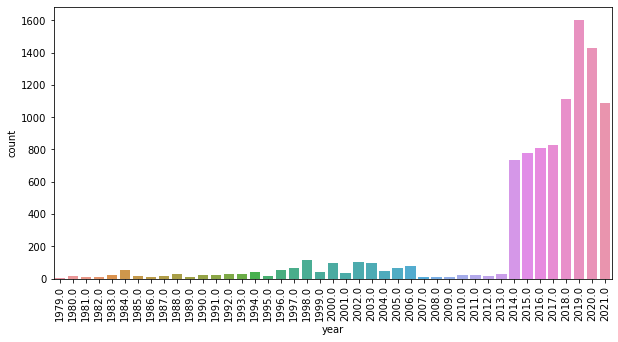

In [17]:
plt.figure(figsize=(10,5))
sns.countplot("year", data=df_train)
plt.xticks(rotation=90)
plt.show()

In [18]:
df_train["year"] = df_train["year"].fillna(2019.0).astype(int)

In [19]:
df_train.head()

,doi,title,abstract,authors,venue,year,references,topics,is_open_access,fields_of_study,citations
0,10.3115/v1/P15-1039,Generating High Quality Proposition Banks for ...,Semantic role labeling (SRL) is crucial to nat...,"A. Akbik,Laura Chiticariu,Marina Danilevsky,Yu...",ACL,2015,39,Semantic role labeling,True,[Computer Science],60
1,10.18653/v1/2020.eval4nlp-1.12,One of these words is not like the other: a re...,Word embeddings are an active topic in the NLP...,"Jesper Brink Andersen,Mikkel Bak Bertelsen,Mik...",EVAL4NLP,2020,44,,True,[Computer Science],1
2,10.18653/v1/W17-3516,The Code2Text Challenge: Text Generation in So...,We propose a new shared task for tactical data...,"Kyle Richardson,Sina Zarrieß,Jonas Kuhn",INLG,2017,30,"Natural language generation,Library (computing...",True,[Computer Science],5
3,10.18653/v1/S17-2160,The Meaning Factory at SemEval-2017 Task 9: Pr...,We evaluate a semantic parser based on a chara...,"Rik van Noord,Johan Bos",SemEval@ACL,2017,11,"Parsing,Convolutional neural network,Text-base...",True,[Computer Science],5
4,10.18653/v1/W15-2205,Semantic Parsing for Textual Entailment,In this paper we gauge the utility of general-...,"Elisabeth Lien,Milen Kouylekov",IWPT,2015,26,"Textual entailment,Parsing,SemEval,Semantic We...",True,[Computer Science],10


In [20]:
df_train["abstract"] = df_train["abstract"].fillna("")

In [21]:
mode1 = df_train["fields_of_study"].mode().values[0]

In [22]:
print(mode1)

['Computer Science']


In [23]:
df_train["fields_of_study"] = df_train["fields_of_study"].apply(lambda d: d if isinstance(d, list) else mode1)

In [24]:
df_train["fields_of_study"] = [",".join(i) for i in df_train["fields_of_study"]]

In [25]:
df_train.head()

,doi,title,abstract,authors,venue,year,references,topics,is_open_access,fields_of_study,citations
0,10.3115/v1/P15-1039,Generating High Quality Proposition Banks for ...,Semantic role labeling (SRL) is crucial to nat...,"A. Akbik,Laura Chiticariu,Marina Danilevsky,Yu...",ACL,2015,39,Semantic role labeling,True,Computer Science,60
1,10.18653/v1/2020.eval4nlp-1.12,One of these words is not like the other: a re...,Word embeddings are an active topic in the NLP...,"Jesper Brink Andersen,Mikkel Bak Bertelsen,Mik...",EVAL4NLP,2020,44,,True,Computer Science,1
2,10.18653/v1/W17-3516,The Code2Text Challenge: Text Generation in So...,We propose a new shared task for tactical data...,"Kyle Richardson,Sina Zarrieß,Jonas Kuhn",INLG,2017,30,"Natural language generation,Library (computing...",True,Computer Science,5
3,10.18653/v1/S17-2160,The Meaning Factory at SemEval-2017 Task 9: Pr...,We evaluate a semantic parser based on a chara...,"Rik van Noord,Johan Bos",SemEval@ACL,2017,11,"Parsing,Convolutional neural network,Text-base...",True,Computer Science,5
4,10.18653/v1/W15-2205,Semantic Parsing for Textual Entailment,In this paper we gauge the utility of general-...,"Elisabeth Lien,Milen Kouylekov",IWPT,2015,26,"Textual entailment,Parsing,SemEval,Semantic We...",True,Computer Science,10


In [26]:
duplicate = df_train.duplicated()
print(duplicate.sum())

1


In [27]:
df_train.drop_duplicates(inplace=True)

In [28]:
dpl = df_train.duplicated()
print(dpl.sum())

0


In [29]:
#checking for correlation
df_train.corr()

,year,references,is_open_access,citations
year,1.000000,0.170608,-0.226951,-0.104649
references,0.170608,1.000000,-0.049499,0.069534
is_open_access,-0.226951,-0.049499,1.000000,0.064013
citations,-0.104649,0.069534,0.064013,1.000000


In [30]:
mode2 = df_test["fields_of_study"].mode().values[0]
mode2

['Computer Science']

In [31]:
df_test["fields_of_study"] = df_test["fields_of_study"].apply(lambda d: d if isinstance(d, list) else mode2)

In [32]:
df_test["fields_of_study"] = [",".join(i) for i in df_test["fields_of_study"]]

In [33]:
df_test["authors"] = [",".join(i) for i in df_test["authors"]]

In [34]:
df_test["topics"] = [",".join(i) for i in df_test["topics"]]

In [35]:
df_test["abstract"] = df_test["abstract"].fillna("")

In [36]:
df_test.head()

,is_open_access,doi,title,fields_of_study,abstract,year,venue,references,authors,topics
0,False,10.18653/v1/2021.findings-acl.255,On Sparsifying Encoder Outputs in Sequence-to-...,Computer Science,Sequence-to-sequence models usually transfer a...,2021,FINDINGS,47,"Biao Zhang,Ivan Titov,Rico Sennrich","Encoder,Transformer,Automatic summarization,Lo..."
1,True,10.18653/v1/2020.acl-main.200,To Pretrain or Not to Pretrain: Examining the ...,"Computer Science,Mathematics",Pretraining NLP models with variants of Masked...,2020,ACL,18,"Sinong Wang,Madian Khabsa,Hao Ma","Supervised learning,Language model,Document cl..."
2,True,10.18653/v1/W18-0211,Utilization of Nganasan digital resources: a s...,Computer Science,"According to the wide-spread belief, although ...",2018,,8,L. Fejes,"Rounding,Lexicon,Tracer,Body of uterus,Class,A..."
3,True,10.18653/v1/N19-1413,A large-scale study of the effects of word fre...,Computer Science,A number of psycholinguistic studies have fact...,2019,NAACL,52,Cory Shain,"Word lists by frequency,Text corpus,Sentence b..."
4,False,10.18653/v1/2021.semeval-1.168,Amherst685 at SemEval-2021 Task 7: Joint Model...,Computer Science,This paper describes our submission to theSemE...,2021,SEMEVAL,17,"Brian Zylich,Akshay Gugnani,Gabriel Brookman,N...",


In [37]:
df_train.head()

,doi,title,abstract,authors,venue,year,references,topics,is_open_access,fields_of_study,citations
0,10.3115/v1/P15-1039,Generating High Quality Proposition Banks for ...,Semantic role labeling (SRL) is crucial to nat...,"A. Akbik,Laura Chiticariu,Marina Danilevsky,Yu...",ACL,2015,39,Semantic role labeling,True,Computer Science,60
1,10.18653/v1/2020.eval4nlp-1.12,One of these words is not like the other: a re...,Word embeddings are an active topic in the NLP...,"Jesper Brink Andersen,Mikkel Bak Bertelsen,Mik...",EVAL4NLP,2020,44,,True,Computer Science,1
2,10.18653/v1/W17-3516,The Code2Text Challenge: Text Generation in So...,We propose a new shared task for tactical data...,"Kyle Richardson,Sina Zarrieß,Jonas Kuhn",INLG,2017,30,"Natural language generation,Library (computing...",True,Computer Science,5
3,10.18653/v1/S17-2160,The Meaning Factory at SemEval-2017 Task 9: Pr...,We evaluate a semantic parser based on a chara...,"Rik van Noord,Johan Bos",SemEval@ACL,2017,11,"Parsing,Convolutional neural network,Text-base...",True,Computer Science,5
4,10.18653/v1/W15-2205,Semantic Parsing for Textual Entailment,In this paper we gauge the utility of general-...,"Elisabeth Lien,Milen Kouylekov",IWPT,2015,26,"Textual entailment,Parsing,SemEval,Semantic We...",True,Computer Science,10


In [38]:
df_train["fields_of_study"].value_counts()

Computer Science                            9098
Computer Science,Mathematics                 176
Computer Science,Psychology                   51
Psychology                                    49
Computer Science,Engineering                  32
Computer Science,Medicine                     31
Psychology,Computer Science                   15
Mathematics                                   13
Engineering,Computer Science                  13
Computer Science,Sociology                    11
Sociology                                     11
Engineering                                   11
Sociology,Computer Science                    11
Political Science                             10
Computer Science,Political Science            10
Mathematics,Computer Science                  10
History                                       10
Medicine,Computer Science                      9
Computer Science,History                       8
Political Science,Computer Science             8
Computer Science,Art

In [39]:
df_train["abstract"][0]

'Semantic role labeling (SRL) is crucial to natural language understanding as it identifies the predicate-argument structure in text with semantic labels. Unfortunately, resources required to construct SRL models are expensive to obtain and simply do not exist for most languages. In this paper, we present a two-stage method to enable the construction of SRL models for resourcepoor languages by exploiting monolingual SRL and multilingual parallel data. Experimental results show that our method outperforms existing methods. We use our method to generate Proposition Banks with high to reasonable quality for 7 languages in three language families and release these resources to the research community.'

In [126]:
Punctuations = string.punctuation
print(Punctuations)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [41]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [42]:
Stopwords = set(stopwords.words('english'))

In [43]:
def clean_text(text):
    text_clean = "".join([word.lower() for word in text if word not in string.punctuation])
    text_rc = re.sub('[0-9]+', '', text_clean)
    tokens = re.split('\W+', text_rc)
    text = [word for word in tokens if word not in Stopwords]
    return text

In [123]:
title = df_train[['title']]
title["clean_title"] = title['title'].apply(lambda x: clean_text(x))

In [124]:
title.drop(['title'], inplace=True, axis=1)

In [46]:
df_train['title'] = title['clean_title']

In [121]:
abstract = df_train[["abstract"]]
abstract['clean_abstract'] = abstract["abstract"].apply(lambda x: clean_text(x))

In [48]:
abstract.drop(['abstract'], inplace = True, axis = 1)

In [49]:
df_train['abstract'] = abstract['clean_abstract']

In [50]:
df_train.head()

,doi,title,abstract,authors,venue,year,references,topics,is_open_access,fields_of_study,citations
0,10.3115/v1/P15-1039,"[generating, high, quality, proposition, banks...","[semantic, role, labeling, srl, crucial, natur...","A. Akbik,Laura Chiticariu,Marina Danilevsky,Yu...",ACL,2015,39,Semantic role labeling,True,Computer Science,60
1,10.18653/v1/2020.eval4nlp-1.12,"[one, words, like, reproduction, outlier, iden...","[word, embeddings, active, topic, nlp, researc...","Jesper Brink Andersen,Mikkel Bak Bertelsen,Mik...",EVAL4NLP,2020,44,,True,Computer Science,1
2,10.18653/v1/W17-3516,"[codetext, challenge, text, generation, source...","[propose, new, shared, task, tactical, datatot...","Kyle Richardson,Sina Zarrieß,Jonas Kuhn",INLG,2017,30,"Natural language generation,Library (computing...",True,Computer Science,5
3,10.18653/v1/S17-2160,"[meaning, factory, semeval, task, producing, a...","[evaluate, semantic, parser, based, characterb...","Rik van Noord,Johan Bos",SemEval@ACL,2017,11,"Parsing,Convolutional neural network,Text-base...",True,Computer Science,5
4,10.18653/v1/W15-2205,"[semantic, parsing, textual, entailment]","[paper, gauge, utility, generalpurpose, opendo...","Elisabeth Lien,Milen Kouylekov",IWPT,2015,26,"Textual entailment,Parsing,SemEval,Semantic We...",True,Computer Science,10


In [51]:
authors = df_train[['authors']]
topics = df_train[['topics']]

In [116]:
authors['authors_k'] = authors['authors'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [117]:
authors['authors_p'] = [x.replace(" ", ",").replace(".","").split(',') for x in authors['authors_k']]

In [125]:
authors.head()

,authors,authors_k,authors_p
0,"A. Akbik,Laura Chiticariu,Marina Danilevsky,Yu...","a. akbik,laura chiticariu,marina danilevsky,yu...","[a, akbik, laura, chiticariu, marina, danilevs..."
1,"Jesper Brink Andersen,Mikkel Bak Bertelsen,Mik...","jesper brink andersen,mikkel bak bertelsen,mik...","[jesper, brink, andersen, mikkel, bak, bertels..."
2,"Kyle Richardson,Sina Zarrieß,Jonas Kuhn","kyle richardson,sina zarrieß,jonas kuhn","[kyle, richardson, sina, zarrieß, jonas, kuhn]"
3,"Rik van Noord,Johan Bos","rik van noord,johan bos","[rik, van, noord, johan, bos]"
4,"Elisabeth Lien,Milen Kouylekov","elisabeth lien,milen kouylekov","[elisabeth, lien, milen, kouylekov]"


In [77]:
df_train['authors'] = authors['authors_p']

In [119]:
topics['topics_k'] = topics['topics'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [120]:
topics['topics_p'] = [x.replace(" ", ",").replace("(","").replace(")","").split(',') for x in topics['topics_k']]

In [103]:
df_train['topics'] = topics['topics_p']

In [104]:
df_train.head()

,doi,title,abstract,authors,venue,year,references,topics,is_open_access,fields_of_study,citations
0,10.3115/v1/P15-1039,"[generating, high, quality, proposition, banks...","[semantic, role, labeling, srl, crucial, natur...","[a, akbik, laura, chiticariu, marina, danilevs...",ACL,2015,39,"[semantic, role, labeling]",True,Computer Science,60
1,10.18653/v1/2020.eval4nlp-1.12,"[one, words, like, reproduction, outlier, iden...","[word, embeddings, active, topic, nlp, researc...","[jesper, brink, andersen, mikkel, bak, bertels...",EVAL4NLP,2020,44,[],True,Computer Science,1
2,10.18653/v1/W17-3516,"[codetext, challenge, text, generation, source...","[propose, new, shared, task, tactical, datatot...","[kyle, richardson, sina, zarrieß, jonas, kuhn]",INLG,2017,30,"[natural, language, generation, library, compu...",True,Computer Science,5
3,10.18653/v1/S17-2160,"[meaning, factory, semeval, task, producing, a...","[evaluate, semantic, parser, based, characterb...","[rik, van, noord, johan, bos]",SemEval@ACL,2017,11,"[parsing, convolutional, neural, network, text...",True,Computer Science,5
4,10.18653/v1/W15-2205,"[semantic, parsing, textual, entailment]","[paper, gauge, utility, generalpurpose, opendo...","[elisabeth, lien, milen, kouylekov]",IWPT,2015,26,"[textual, entailment, parsing, semeval, semant...",True,Computer Science,10
